In [14]:
import pandas as pd
train_data = pd.read_csv("Training.csv")

In [17]:
import xgboost as xgb
import matplotlib as plt
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression

In [455]:
train_data

,survived,upper,middle,sex,children,senior,sib_0,sib_>2,par_0,par_>2
0,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,1,0
5,0,0,0,1,0,0,1,0,1,0
6,0,1,0,1,0,0,1,0,1,0
7,0,0,0,1,1,0,0,1,0,0
8,1,0,0,0,0,0,1,0,0,0
9,1,0,1,0,0,0,0,0,1,0


In [334]:
from sklearn.model_selection import train_test_split
data_x=train_data.drop(columns='survived')
data_y=train_data['survived']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3, random_state=101)

In [335]:
print(train_x)
print(train_y)
print(test_x)
print(test_y)

     upper  middle  sex  children  senior  sib_0  sib_>2  par_0  par_>2
520      1       0    0         0       0      1       0      1       0
510      0       0    1         0       0      1       0      1       0
446      0       1    0         0       0      1       0      0       0
2        0       0    0         0       0      1       0      1       0
691      0       0    0         1       0      1       0      0       0
195      1       0    0         0       0      1       0      1       0
790      0       0    1         0       0      1       0      1       0
257      1       0    0         0       0      1       0      1       0
39       0       0    0         0       0      0       0      1       0
234      0       1    1         0       0      1       0      1       0
832      0       0    1         0       0      1       0      1       0
341      1       0    0         0       0      0       1      0       0
646      0       0    1         0       0      1       0      1 

In [354]:
params = {
    'booster':          'gblinear',
    'num_rounds':        20,
    'alpha':             0,
    'lambda':            0,
    'objective':         'binary:logistic',
    'updater':           'shotgun',          
    'feature_selector':  'shuffle'
}

In [437]:
paramsd = {
    'booster':          'gbtree',
    'num_rounds':        15,
    'max_depth':         6,
    'max_leaves':        0,
    'alpha':             0,
    'eta':               0.3,
    'gamma':             0,
    'subsample':         1,
    'lambda':            0,
    'scale_pos_weight':  1.5,
    'objective':         'binary:logistic',       
}

In [422]:
def test():
    datatrain = xgb.DMatrix(train_x,label=train_y)
    dtest = xgb.DMatrix(test_x, label=test_y)
    evals = [(dtest, 'eval'), (datatrain, 'train')]
    num_rounds = params['num_rounds']
    xgbmodel = xgb.train(params, datatrain, num_rounds, evals=evals)
    y_predxgb=[i>0.5 for i in xgbmodel.predict(dtest)]
    return round(accuracy_score(test_y,y_predxgb),4)
test()

[0]	eval-error:0.208955	train-error:0.17175
[1]	eval-error:0.208955	train-error:0.17175
[2]	eval-error:0.208955	train-error:0.17175
[3]	eval-error:0.208955	train-error:0.170144
[4]	eval-error:0.208955	train-error:0.170144
[5]	eval-error:0.208955	train-error:0.170144
[6]	eval-error:0.212687	train-error:0.170144
[7]	eval-error:0.208955	train-error:0.170144
[8]	eval-error:0.208955	train-error:0.170144
[9]	eval-error:0.208955	train-error:0.170144
[10]	eval-error:0.208955	train-error:0.170144
[11]	eval-error:0.19403	train-error:0.168539
[12]	eval-error:0.19403	train-error:0.168539
[13]	eval-error:0.19403	train-error:0.168539
[14]	eval-error:0.19403	train-error:0.168539


0.806

In [438]:
p={'alpha':[0.02*i for i in range(51)],
  'eta':[0.02*i for i in range(51)],
   'gamma':[0.02*i for i in range(51)],
    'lambda':[0.02*i for i in range(51)],
    'scale_pos_weight':[1+0.02*i for i in range(51)]}


In [449]:
def ptest(p):
    col=pd.DataFrame(columns=['pname','value','acc'])
    for i in p.keys():
        for j in p[i]:
            params=paramsd
            params[i]=j
            accu=test()
            col=col.append(pd.Series([i,j,accu],index=['pname','value','acc']),ignore_index=True)
    return col
ans=ptest(p)
            
    

[0]	eval-error:0.208955	train-error:0.17175
[1]	eval-error:0.208955	train-error:0.17175
[2]	eval-error:0.208955	train-error:0.17175
[3]	eval-error:0.208955	train-error:0.170144
[4]	eval-error:0.208955	train-error:0.170144
[5]	eval-error:0.208955	train-error:0.170144
[6]	eval-error:0.212687	train-error:0.170144
[7]	eval-error:0.208955	train-error:0.170144
[8]	eval-error:0.208955	train-error:0.170144
[9]	eval-error:0.208955	train-error:0.170144
[10]	eval-error:0.208955	train-error:0.170144
[11]	eval-error:0.19403	train-error:0.168539
[12]	eval-error:0.19403	train-error:0.168539
[13]	eval-error:0.19403	train-error:0.168539
[14]	eval-error:0.19403	train-error:0.168539
[0]	eval-error:0.208955	train-error:0.17175
[1]	eval-error:0.208955	train-error:0.17175
[2]	eval-error:0.208955	train-error:0.17175
[3]	eval-error:0.208955	train-error:0.170144
[4]	eval-error:0.208955	train-error:0.170144
[5]	eval-error:0.208955	train-error:0.170144
[6]	eval-error:0.212687	train-error:0.170144
[7]	eval-error:

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[9]	eval-error:0.208955	train-error:0.170144
[10]	eval-error:0.208955	train-error:0.170144
[11]	eval-error:0.19403	train-error:0.168539
[12]	eval-error:0.19403	train-error:0.168539
[13]	eval-error:0.19403	train-error:0.168539
[14]	eval-error:0.19403	train-error:0.168539
[0]	eval-error:0.208955	train-error:0.17175
[1]	eval-error:0.208955	train-error:0.17175
[2]	eval-error:0.208955	train-error:0.17175
[3]	eval-error:0.208955	train-error:0.170144
[4]	eval-error:0.208955	train-error:0.170144
[5]	eval-error:0.208955	train-error:0.170144
[6]	eval-error:0.212687	train-error:0.170144
[7]	eval-error:0.208955	train-error:0.170144
[8]	eval-error:0.208955	train-error:0.170144
[9]	eval-error:0.208955	train-error:0.170144
[10]	eval-error:0.208955	train-error:0.170144
[11]	eval-error:0.19403	train-error:0.168539
[12]	eval-error:0.19403	train-error:0.168539
[13]	eval-error:0.19403	train-error:0.168539
[14]	eval-error:0.19403	train-error:0.168539
[0]	eval-error:0.208955	train-error:0.17175
[1]	eval-err

In [450]:
ans

,pname,value,acc
0,alpha,0.00,0.806
1,alpha,0.02,0.806
2,alpha,0.04,0.806
3,alpha,0.06,0.806
4,alpha,0.08,0.806
5,alpha,0.10,0.806
6,alpha,0.12,0.806
7,alpha,0.14,0.806
8,alpha,0.16,0.806
9,alpha,0.18,0.806


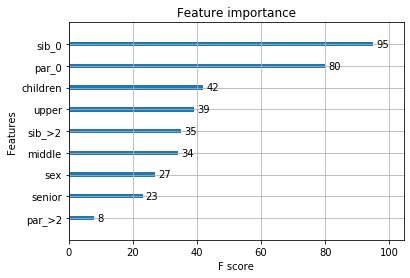

In [394]:
xgb.plot_importance(model)

In [402]:
import numpy as np
y_predxgb=[i>0.5 for i in xgbmodel.predict(dtest)]
accuracy_score(test_y,y_predxgb)

0.8171641791044776

In [403]:
print(classification_report(test_y,y_predxgb))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       154
           1       0.84      0.71      0.77       114

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [377]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [399]:
y_pred=logmodel.predict(test_x)

In [401]:
accuracy_score(test_y,y_pred)

0.7761194029850746

In [380]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       154
           1       0.80      0.63      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

